In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile, execute
import qiskit
# import basic plot tools
from qiskit.visualization import plot_histogram

from gates import *
from mtable import *
from data import *

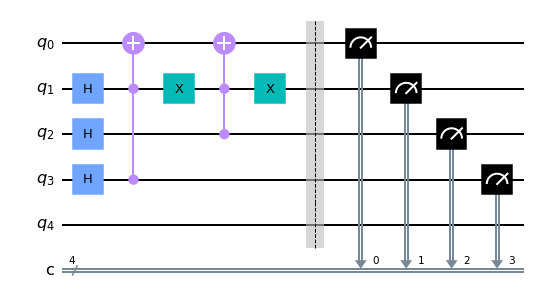

In [2]:
qc = qot()
# qc = qc.decompose()
qc.draw(output='mpl', filename="qot.png",fold=-1)

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_santiago')
print("least busy backend: ", backend)

least busy backend:  ibmq_santiago


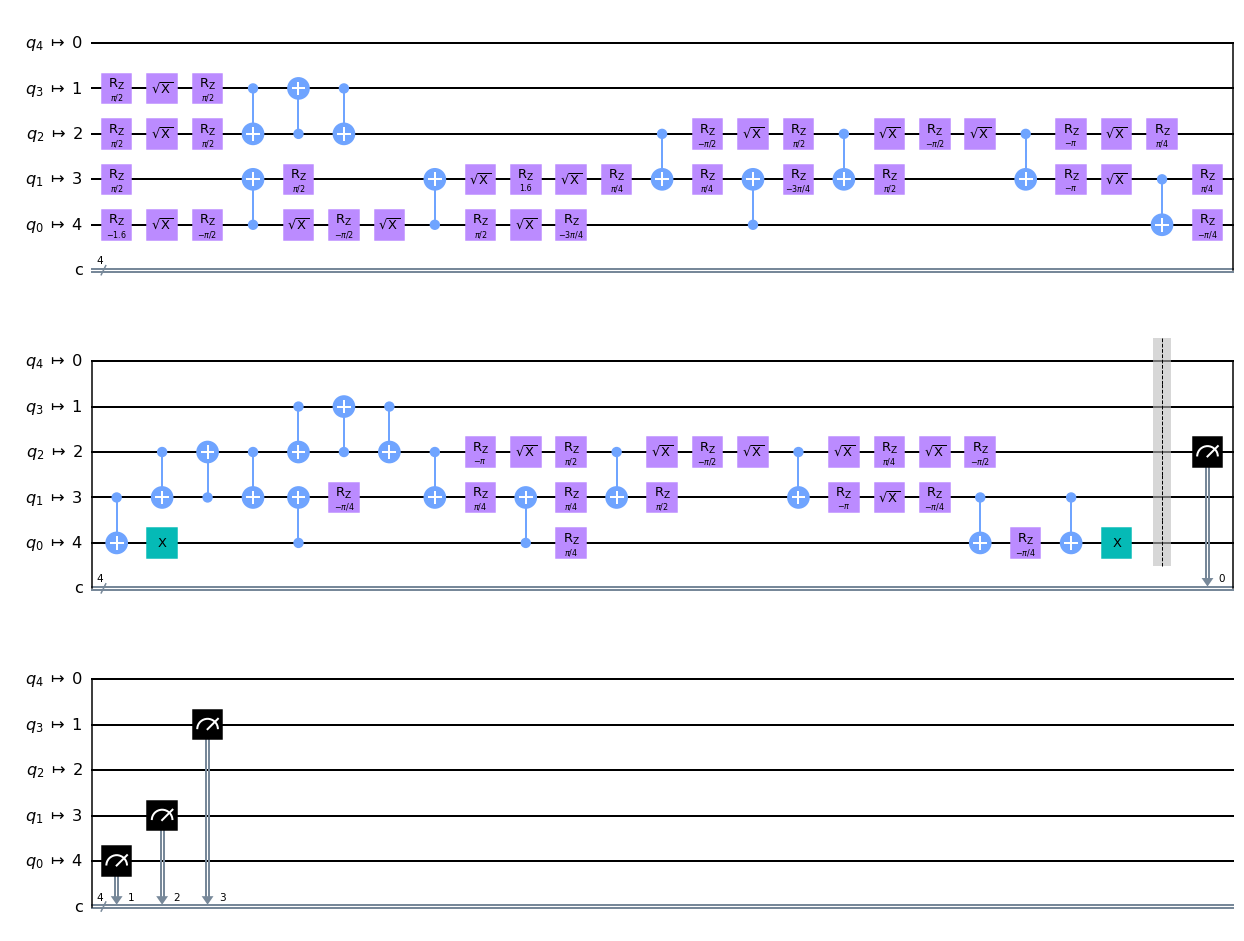

In [11]:
transpiled = transpile(qc, backend, optimization_level=3)
transpiled.qasm(filename='qot_ibmq')
transpiled.draw(output='mpl', filename="tqot.png",
#                 fold=-1,
               )

In [4]:
from qiskit.tools.monitor import job_monitor
shots = 2048
job = backend.run(transpiled, shots=shots, memory=True)
job_monitor(job, interval=2)

NameError: name 'transpiled' is not defined

In [7]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise

def noisymodel(prob_1=0.001, prob_2 = 0.01):
    error_1 = noise.depolarizing_error(prob_1, 1)
    error_2 = noise.depolarizing_error(prob_2, 2)

    noise_model = noise.NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
    noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    basis_gates = noise_model.basis_gates
    return noise_model, basis_gates

for err in np.linspace(0,0.02,11):
    noise_model, basis_gates = noisymodel(prob_2=err)
    result = execute(qc, Aer.get_backend('qasm_simulator'),
                     basis_gates=basis_gates,
                     noise_model=noise_model,
                     shots=shots,
                     memory=True,
                    ).result()   
    memory = result.get_memory()
    print(err, error(memory))


0.0 0.0107421875
0.002 0.0185546875
0.004 0.02734375
0.006 0.03857421875
0.008 0.0458984375
0.01 0.06201171875
0.012 0.06640625
0.014 0.0732421875
0.016 0.0908203125
0.018000000000000002 0.10888671875
0.02 0.10400390625


In [11]:
from qiskit.visualization import plot_histogram
from dot_product import *

def error(ls):
    e = 0
    for s in ls:
        if s[1-int(s[2])] != s[3]:
            e += 1
    return e/len(ls)

memory = result.get_memory()
print(error(memory))

l = lambda_factor(error(memory), 3)
l

NameError: name 'results' is not defined

In [8]:
from dot_product import *


a = torch.tensor([0.4, 0.2, 0.4])
b = torch.tensor([0.4, 0.1, 0.3])


p = ot_mul_stats(a,b,memory)
c = corrected_l(p, l)
print(p, c, torch.dot(a,b))

NameError: name 'l' is not defined

In [12]:
import pandas as pd
cnot0='$\mathtt{CNOT} error$'
cnot = '$\mathtt{CNOT}\: \mathrm{error}$'
st = '$\mathrm{Shots}$'
vl = '$\mathrm{Value}$'

df = df = pd.DataFrame({'$\mathtt{CNOT}$ error':[], 'Shots':[], 'Value':[],})
for err in np.linspace(0,0.02,11):
    noise_model, basis_gates = noisymodel(prob_2=err)
    result = execute(qc, Aer.get_backend('qasm_simulator'),
                     basis_gates=basis_gates,
                     noise_model=noise_model,
                     shots=shots,
                     memory=True,
                    ).result()   
    memory = result.get_memory()
    l = lambda_factor(error(memory), 3)
    for shots in range(100, 2001, 100):
        print(err, shots)
        for _ in range(10):
            p = ot_mul_stats(a,b,memory, shots=shots)
            c = corrected_l(p, l)
            df=df.append({'$\mathtt{CNOT}$ error':err, 'Shots':shots, 'Value':c,}, ignore_index=True)

0.0 100
0.0 200
0.0 300
0.0 400
0.0 500
0.0 600
0.0 700
0.0 800
0.0 900
0.0 1000
0.0 1100
0.0 1200
0.0 1300
0.0 1400
0.0 1500
0.0 1600
0.0 1700
0.0 1800
0.0 1900
0.0 2000
0.002 100
0.002 200
0.002 300
0.002 400
0.002 500
0.002 600
0.002 700
0.002 800
0.002 900
0.002 1000
0.002 1100
0.002 1200
0.002 1300
0.002 1400
0.002 1500
0.002 1600
0.002 1700
0.002 1800
0.002 1900
0.002 2000
0.004 100
0.004 200
0.004 300
0.004 400
0.004 500
0.004 600
0.004 700
0.004 800
0.004 900
0.004 1000
0.004 1100
0.004 1200
0.004 1300
0.004 1400
0.004 1500
0.004 1600
0.004 1700
0.004 1800
0.004 1900
0.004 2000
0.006 100
0.006 200
0.006 300
0.006 400
0.006 500
0.006 600
0.006 700
0.006 800
0.006 900
0.006 1000
0.006 1100
0.006 1200
0.006 1300
0.006 1400
0.006 1500
0.006 1600
0.006 1700
0.006 1800
0.006 1900
0.006 2000
0.008 100
0.008 200
0.008 300
0.008 400
0.008 500
0.008 600
0.008 700
0.008 800
0.008 900
0.008 1000
0.008 1100
0.008 1200
0.008 1300
0.008 1400
0.008 1500
0.008 1600
0.008 1700
0.008 1800
0.008 1

In [59]:
df = pd.read_pickle('error.pickle')
# df = df[df[cnot].isin([0., 0.004, 0.008, 0.012, 0.016, 0.02])]
df

,$\mathtt{CNOT}$ error,Shots,Value
0,0.00,100.0,0.320000
1,0.00,100.0,0.300000
2,0.00,100.0,0.340000
3,0.00,100.0,0.210000
4,0.00,100.0,0.250000
...,...,...,...
2195,0.02,2000.0,0.301982
2196,0.02,2000.0,0.326456
2197,0.02,2000.0,0.311995
2198,0.02,2000.0,0.310882


In [50]:
cnot0='$\mathtt{CNOT}$ error'
cnot = '$\mathtt{CNOT}\: \mathrm{error}$'
st = '$\mathrm{Shots}$'
vl = '$\mathrm{Value}$'

In [60]:
df = pd.read_pickle('error.pickle')
df = df.rename(columns={cnot0: cnot, 'Shots':st, 'Value':vl})
df = df[df[cnot].isin([0., 0.002, 0.004, 0.02])]
df.columns

Index(['$\mathtt{CNOT}\: \mathrm{error}$', '$\mathrm{Shots}$',
       '$\mathrm{Value}$'],
      dtype='object')

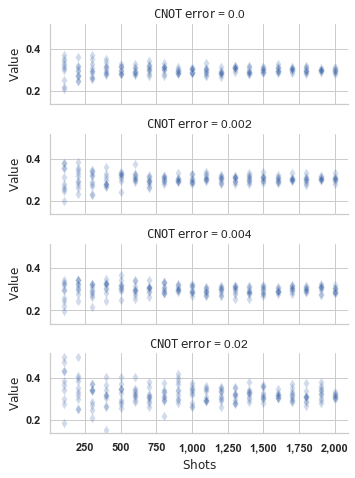

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tkr
font = {'family' : 'sans-serif',
        'sans-serif':'Arial',
        'weight' : 'bold',
        'size'   : 48}
mpl.rc('font', **font)
plt.rc('font', **font)

sns.set_theme(style="whitegrid")

g = sns.FacetGrid(df, row=cnot,
#                   row_order=ordered_days,
                  height=1.7, aspect=3,)
g.map(sns.scatterplot, st, vl,alpha=.25,marker="d", s=48)

for ax in g.axes[0]:
    ax.xaxis.set_major_formatter(
        tkr.FuncFormatter(lambda x, p: "{:,}".format(int(x))))
g.savefig("err.pdf")